<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

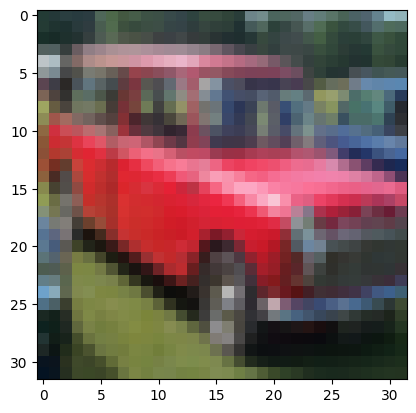

[1]


In [ ]:
import matplotlib.pyplot as plt
cifar = x_train[136]
plt.imshow(cifar, cmap=plt.cm.binary)
plt.show()
print(y_train[136])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3000, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_13 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dense_15 (Dense)            (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

print('Shape of x_train:', x_train.shape)
print('Shape of x_test', x_test.shape)

Shape of x_train: (50000, 3072)
Shape of x_test (10000, 3072)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/10
391/391 [==============================] - 106s 270ms/step - loss: 2.2124 - accuracy: 0.2532
Epoch 2/10
391/391 [==============================] - 106s 271ms/step - loss: 1.8068 - accuracy: 0.3497
Epoch 3/10
391/391 [==============================] - 107s 275ms/step - loss: 1.7076 - accuracy: 0.3855
Epoch 4/10
391/391 [==============================] - 104s 266ms/step - loss: 1.6369 - accuracy: 0.4149
Epoch 5/10
391/391 [==============================] - 108s 276ms/step - loss: 1.5757 - accuracy: 0.4355
Epoch 6/10
391/391 [==============================] - 106s 271ms/step - loss: 1.5306 - accuracy: 0.4531
Epoch 7/10
391/391 [==============================] - 108s 275ms/step - loss: 1.4886 - accuracy: 0.4675
Epoch 8/10
391/391 [==============================] - 105s 270ms/step - loss: 1.4482 - accuracy: 0.4813
Epoch 9/10
391/391 [==============================] - 106s 272ms/step - loss: 1.4110 - accuracy: 0.4958
Epoch 10/10
313/313 [==============================] - 9s 28ms/s

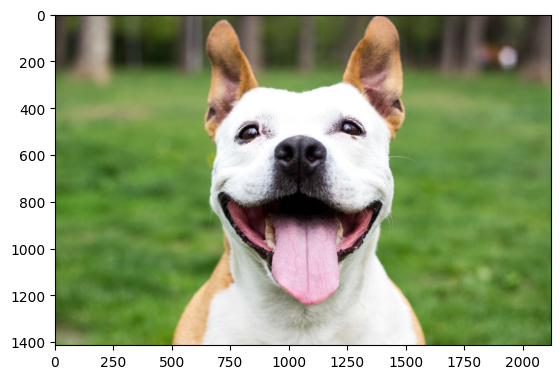

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img('dog.jpg')
plt.imshow(img)
plt.show()

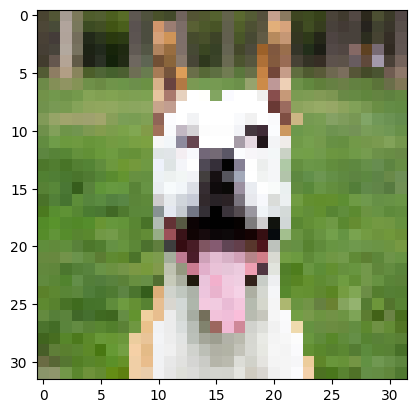

In [ ]:
img = load_img('dog.jpg', target_size=(32,32))
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')/255
np.argmax(model.predict(img), axis=-1)

1/1 [==============================] - 0s 150ms/step


array([6])

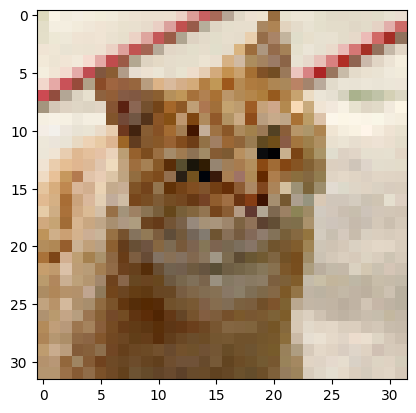

In [ ]:
img = load_img('Cat03.jpg', target_size=(32,32))
plt.imshow(img)
plt.show()

In [ ]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')/255
np.argmax(model.predict(img), axis=-1)

1/1 [==============================] - 0s 26ms/step


array([6])